In [99]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')


In [2]:
data = pd.read_csv('species.csv')


C:\Users\am737\AppData\Local\Temp\ipykernel_9856\3053673837.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('species.csv')


In [3]:
data.head()

,Species ID,Park Name,Category,Order,Family,Scientific Name,Common Names,Record Status,Occurrence,Nativeness,Abundance,Seasonality,Conservation Status,Unnamed: 13
0,ACAD-1000,Acadia National Park,Mammal,Artiodactyla,Cervidae,Alces alces,Moose,Approved,Present,Native,Rare,Resident,NaN,NaN
1,ACAD-1001,Acadia National Park,Mammal,Artiodactyla,Cervidae,Odocoileus virginianus,"Northern White-Tailed Deer, Virginia Deer, Whi...",Approved,Present,Native,Abundant,NaN,NaN,NaN
2,ACAD-1002,Acadia National Park,Mammal,Carnivora,Canidae,Canis latrans,"Coyote, Eastern Coyote",Approved,Present,Not Native,Common,NaN,Species of Concern,NaN
3,ACAD-1003,Acadia National Park,Mammal,Carnivora,Canidae,Canis lupus,"Eastern Timber Wolf, Gray Wolf, Timber Wolf",Approved,Not Confirmed,Native,NaN,NaN,Endangered,NaN
4,ACAD-1004,Acadia National Park,Mammal,Carnivora,Canidae,Vulpes vulpes,"Black Fox, Cross Fox, Eastern Red Fox, Fox, Re...",Approved,Present,Unknown,Common,Breeder,NaN,NaN


In [5]:
data.shape

(119248, 14)

In [4]:
data.columns

Index(['Species ID', 'Park Name', 'Category', 'Order', 'Family',
       'Scientific Name', 'Common Names', 'Record Status', 'Occurrence',
       'Nativeness', 'Abundance', 'Seasonality', 'Conservation Status',
       'Unnamed: 13'],
      dtype='object')

In [6]:
# Select relevant columns for analysis 
relevant_columns = ['Park Name', 'Category', 'Order', 'Family', 'Nativeness',
       'Abundance', 'Conservation Status']
data = data[relevant_columns]


In [7]:
# Handle missing values 
data.replace('Unknown', np.nan, inplace=True)
data.dropna(inplace=True)


In [8]:
data.head()

,Park Name,Category,Order,Family,Nativeness,Abundance,Conservation Status
2,Acadia National Park,Mammal,Carnivora,Canidae,Not Native,Common,Species of Concern
20,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Native,Uncommon,Species of Concern
24,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Native,Common,Species of Concern
26,Acadia National Park,Mammal,Chiroptera,Vespertilionidae,Native,Common,Species of Concern
55,Acadia National Park,Bird,Accipitriformes,Accipitridae,Native,Uncommon,Species of Concern


In [12]:
data.shape

(2956, 7)

In [9]:
# Encode categorical data using one-hot encoding
encoder = TransactionEncoder()
encoded_data = encoder.fit_transform(data.values)


In [10]:
# Convert encoded_data to a pandas DataFrame
data_df = pd.DataFrame(encoded_data, columns=encoder.columns_)


In [11]:
data_df.head()

,Abundant,Acadia National Park,Acanthaceae,Accipitridae,Accipitriformes,Acipenseridae,Acipenseriformes,Acroporidae,Aegithalidae,Alcidae,...,Viperidae,Vireonidae,Voyageurs National Park,Wind Cave National Park,Woodsiaceae,Wrangell - St Elias National Park and Preserve,Xantusiidae,Yellowstone National Park,Yosemite National Park,Zion National Park
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
data_df.shape

(2956, 358)

# Apriori Algorithm

In [87]:
# Define minimum support threshold
min_support = 0.5


In [88]:
# Frequent itemset generation
frequent_itemsets_apriori = apriori(data_df, min_support=min_support, use_colnames=True)

In [110]:

# Print frequent itemsets
print("Frequent Itemsets (Apriori):")
print(frequent_itemsets_apriori)


Frequent Itemsets (Apriori):
    support                            itemsets
0  0.681326                              (Bird)
1  0.982747                            (Native)
2  0.853857                (Species of Concern)
3  0.670162                      (Native, Bird)
4  0.625507          (Species of Concern, Bird)
5  0.839648        (Species of Concern, Native)
6  0.615020  (Species of Concern, Native, Bird)


In [114]:
# Generate association rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.8)

# Print association rules
print("Association Rules (Apriori):")
pd.DataFrame(rules_apriori)

Association Rules (Apriori):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bird),(Native),0.681326,0.982747,0.670162,0.983615,1.000883,0.000591,1.052959,0.002768
1,(Bird),(Species of Concern),0.681326,0.853857,0.625507,0.918073,1.075208,0.043753,1.783836,0.219495
2,(Species of Concern),(Native),0.853857,0.982747,0.839648,0.983360,1.000624,0.000523,1.036826,0.004264
3,(Native),(Species of Concern),0.982747,0.853857,0.839648,0.854389,1.000624,0.000523,1.003656,0.036119
4,"(Species of Concern, Bird)",(Native),0.625507,0.982747,0.615020,0.983234,1.000496,0.000305,1.029061,0.001323
5,"(Native, Bird)",(Species of Concern),0.670162,0.853857,0.615020,0.917718,1.074792,0.042798,1.776136,0.210975
6,(Bird),"(Species of Concern, Native)",0.681326,0.839648,0.615020,0.902681,1.075071,0.042946,1.647697,0.219123


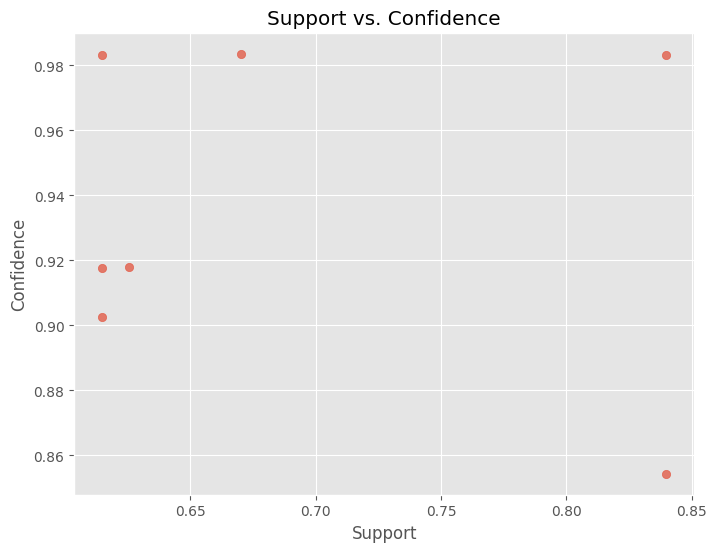

In [115]:
# Extract support and confidence values from the rules
supports = rules_apriori['support'].tolist()
confidences = rules_apriori['confidence'].tolist()

# Scatter plot for support vs confidence
plt.figure(figsize=(8, 6))
plt.scatter(supports, confidences, alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid(True)
plt.show()


In [119]:
# Filter for high confidence and lift
filtered_rules = rules_apriori[(rules_apriori['confidence'] > 0.8) & (rules_apriori['support'] > 0.6)]

# Sort by lift in descending order
sorted_rules = rules_apriori.sort_values(by='lift', ascending=False)


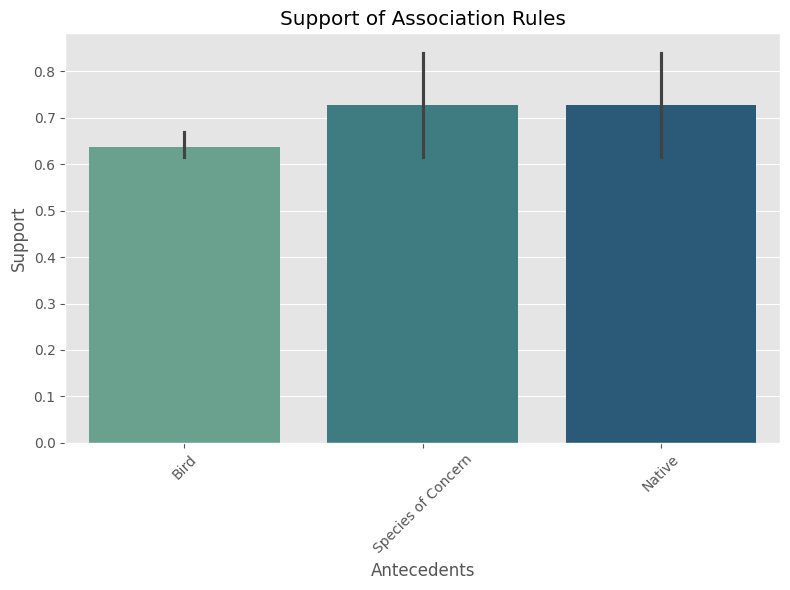

In [125]:
antecedents = filtered_rules.antecedents.apply(lambda x: list(x)[0]).tolist()
support = filtered_rules['support'].tolist()

# Bar chart for support values
plt.figure(figsize=(8, 6))
sns.barplot(x=antecedents, y=support, palette='crest', hue=antecedents)
plt.xlabel('Antecedents')
plt.ylabel('Support')
plt.xticks(rotation=45)  
plt.title('Support of Association Rules')
plt.tight_layout()
plt.show()


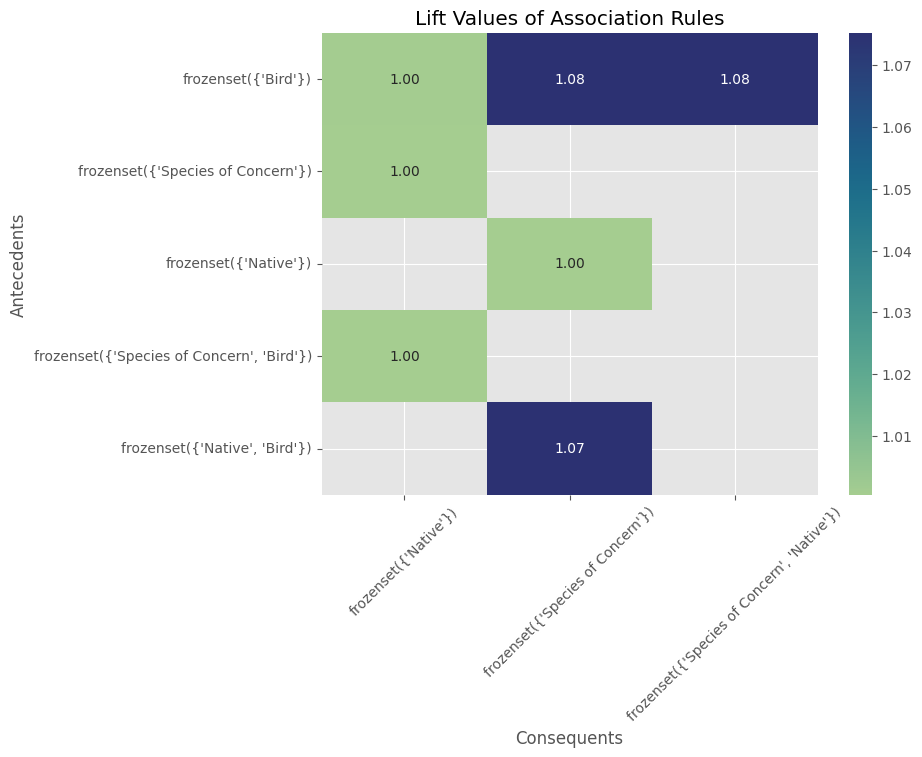

In [127]:
# Create a pivot table
pivot_table = rules_apriori.pivot(index='antecedents', columns='consequents', values='lift')

# Heatmap for lift values
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='crest')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.xticks(rotation=45)  
plt.title('Lift Values of Association Rules')
plt.show()


## Expanding the Search

In [128]:
# Define minimum support threshold
min_support = 0.1


In [129]:
# Frequent itemset generation
frequent_itemsets_apriori = apriori(data_df, min_support=min_support, use_colnames=True)

In [131]:
print("Number of Frequent Itemsets (Apriori): ", frequent_itemsets_apriori.shape[0])



Number Frequent Itemsets (Apriori):  59


In [132]:
# Generate association rules
rules_apriori = association_rules(frequent_itemsets_apriori, metric="confidence", min_threshold=0.8)

print("Number of Association Rules (Apriori):", rules_apriori.shape[0])


Number of Association Rules (Apriori): 92


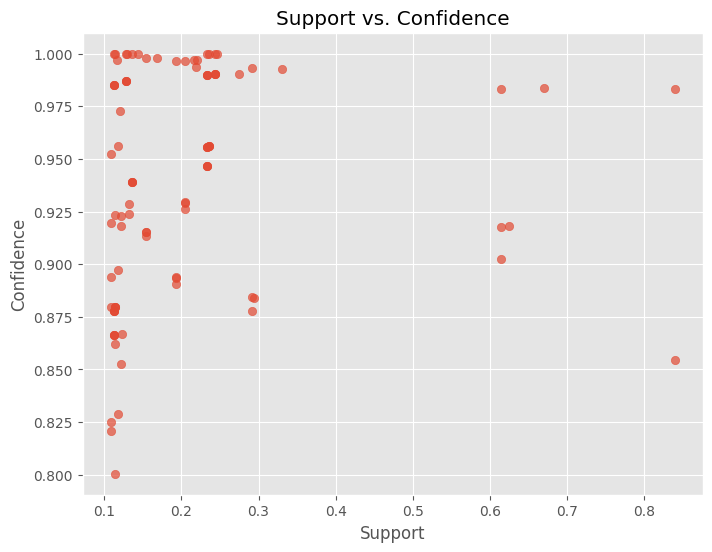

In [133]:
# Extract support and confidence values from the rules
supports = rules_apriori['support'].tolist()
confidences = rules_apriori['confidence'].tolist()

# Scatter plot for support vs confidence
plt.figure(figsize=(8, 6))
plt.scatter(supports, confidences, alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid(True)
plt.show()


In [136]:
# Filter for high confidence and support
filtered_rules = rules_apriori[(rules_apriori['confidence'] > 0.8) & (rules_apriori['support'] > 0.6)]

# Sort by lift in descending order
sorted_rules = rules_apriori.sort_values(by='lift', ascending=False)

# Print top 10 rules
print("Top 10 Association Rules (Apriori):")
pd.DataFrame(sorted_rules).head(10)



Top 10 Association Rules (Apriori):


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
85,(Passeriformes),"(Species of Concern, Native, Bird)",0.246279,0.615020,0.233085,0.946429,1.538857,0.081619,7.186288,0.464585
47,(Passeriformes),"(Species of Concern, Bird)",0.246279,0.625507,0.235453,0.956044,1.528429,0.081404,8.519706,0.458702
84,"(Passeriformes, Native)","(Species of Concern, Bird)",0.243911,0.625507,0.233085,0.955617,1.527747,0.080517,8.437785,0.456879
36,(Passeriformes),"(Native, Bird)",0.246279,0.670162,0.243911,0.990385,1.477828,0.078864,34.303112,0.428980
82,"(Passeriformes, Species of Concern)","(Native, Bird)",0.235453,0.670162,0.233085,0.989943,1.477168,0.075293,32.795283,0.422511
22,(Accipitriformes),"(Native, Bird)",0.129229,0.670162,0.127537,0.986911,1.472645,0.040933,25.199594,0.368581
66,"(Species of Concern, Accipitriformes)","(Native, Bird)",0.113667,0.670162,0.111976,0.985119,1.469971,0.035800,22.165088,0.360716
63,"(Species of Concern, Accipitriformes, Native)",(Bird),0.111976,0.681326,0.111976,1.000000,1.467726,0.035684,inf,0.358857
34,"(Passeriformes, Native)",(Bird),0.243911,0.681326,0.243911,1.000000,1.467726,0.077728,inf,0.421477
23,"(Species of Concern, Accipitriformes)",(Bird),0.113667,0.681326,0.113667,1.000000,1.467726,0.036223,inf,0.359542


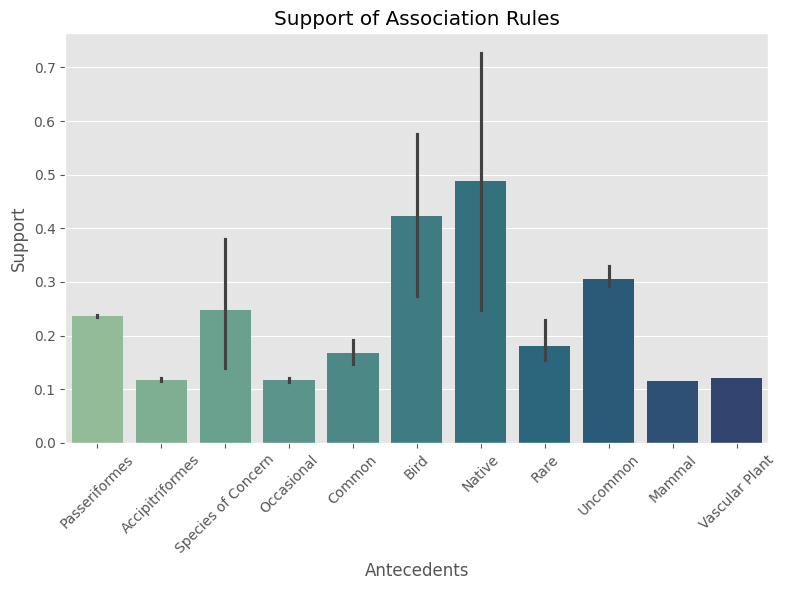

In [141]:
antecedents = sorted_rules.antecedents.apply(lambda x: list(x)[0]).tolist()
support = sorted_rules['support'].tolist()

# Bar chart for support values
plt.figure(figsize=(8, 6))
sns.barplot(x=antecedents, y=support, palette='crest', hue=antecedents)
plt.xlabel('Antecedents')
plt.ylabel('Support')
plt.xticks(rotation=45)  
plt.title('Support of Association Rules')
plt.tight_layout()
plt.show()


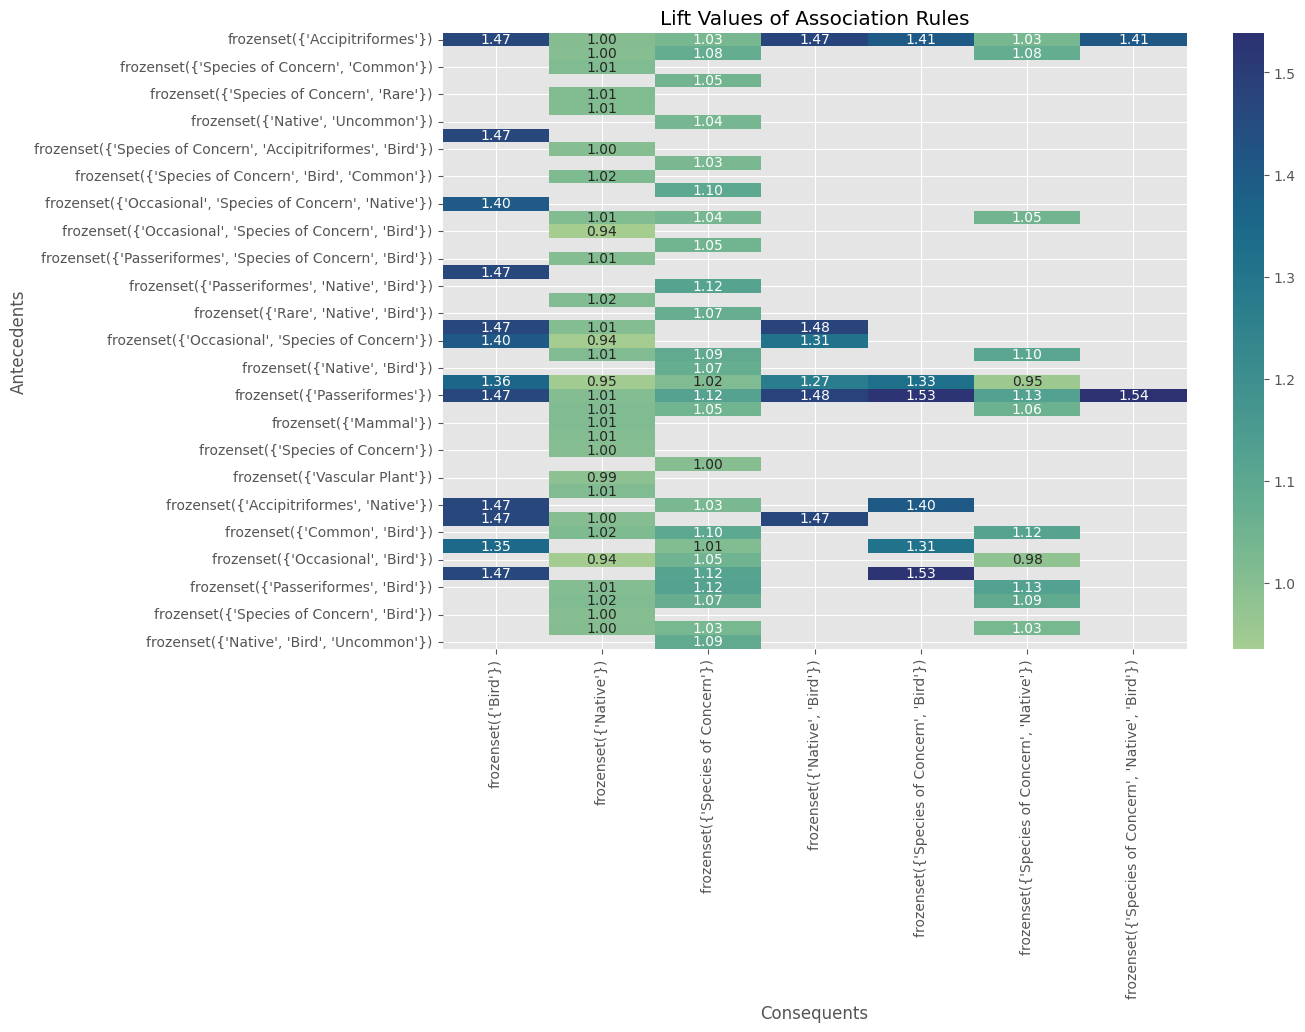

In [140]:
# Create a pivot table
pivot_table = rules_apriori.pivot(index='antecedents', columns='consequents', values='lift')

# Heatmap for lift values
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='crest')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
# plt.xticks(rotation=45)  
plt.title('Lift Values of Association Rules')
plt.show()


# FP-Growth Algorithm

In [142]:
min_support = 0.5

# Frequent pattern mining
frequent_itemsets_fpgrowth = fpgrowth(data_df, min_support=min_support,  use_colnames=True)

# Print frequent itemsets
print("Frequent Itemsets (FP-Growth):")
print(frequent_itemsets_fpgrowth)


Frequent Itemsets (FP-Growth):
    support                            itemsets
0  0.853857                (Species of Concern)
1  0.982747                            (Native)
2  0.681326                              (Bird)
3  0.839648        (Species of Concern, Native)
4  0.670162                      (Native, Bird)
5  0.625507          (Species of Concern, Bird)
6  0.615020  (Species of Concern, Native, Bird)


In [151]:
# Generate association rules
rules_fpgrowth = association_rules(frequent_itemsets_fpgrowth, metric="confidence", min_threshold=0.8)

# Print association rules
print("Association Rules (FP-Growth):")
print(rules_fpgrowth)

Association Rules (FP-Growth):
                  antecedents                   consequents  \
0        (Species of Concern)                      (Native)   
1                    (Native)          (Species of Concern)   
2                      (Bird)                      (Native)   
3                      (Bird)          (Species of Concern)   
4  (Species of Concern, Bird)                      (Native)   
5              (Native, Bird)          (Species of Concern)   
6                      (Bird)  (Species of Concern, Native)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.853857            0.982747  0.839648    0.983360  1.000624   
1            0.982747            0.853857  0.839648    0.854389  1.000624   
2            0.681326            0.982747  0.670162    0.983615  1.000883   
3            0.681326            0.853857  0.625507    0.918073  1.075208   
4            0.625507            0.982747  0.615020    0.983234  1.000496   
5 

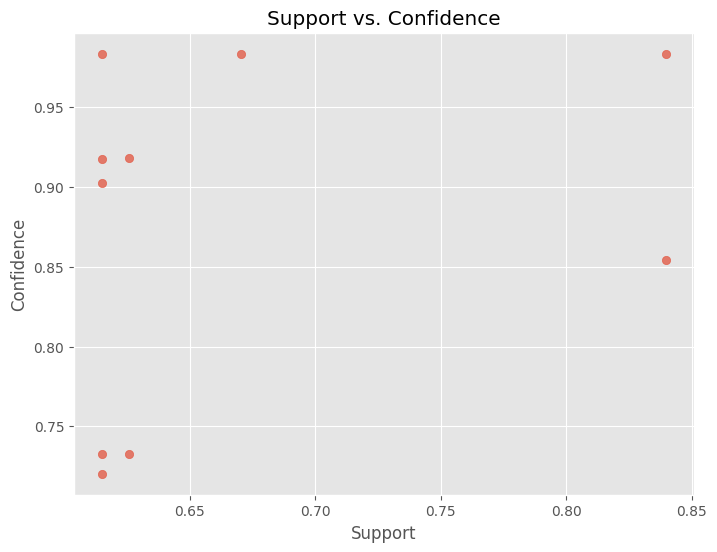

In [144]:
# Extract support and confidence values from the rules
supports = rules_fpgrowth['support'].tolist()
confidences = rules_fpgrowth['confidence'].tolist()

# Scatter plot for support vs confidence
plt.figure(figsize=(8, 6))
plt.scatter(supports, confidences, alpha=0.7)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.grid(True)
plt.show()


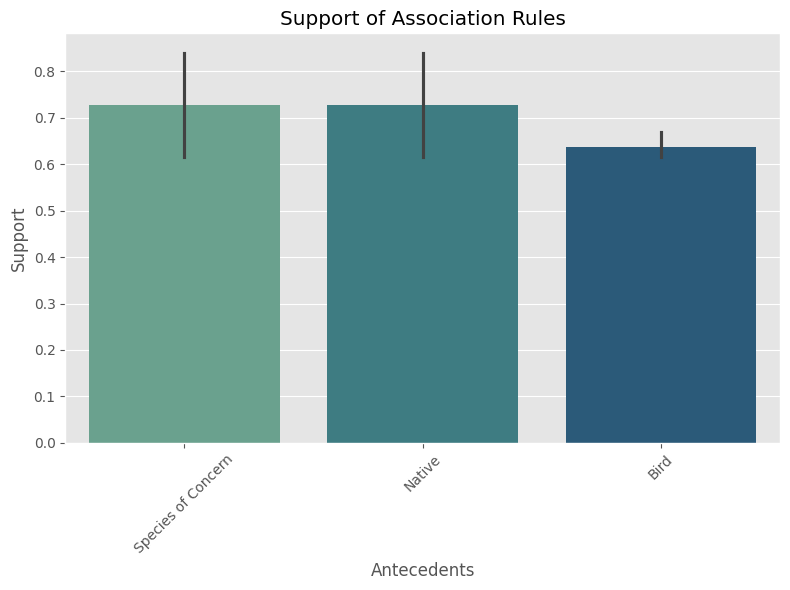

In [153]:
antecedents = rules_fpgrowth.antecedents.apply(lambda x: list(x)[0]).tolist()
support = rules_fpgrowth['support'].tolist()


# Bar chart for support values
plt.figure(figsize=(8, 6))
sns.barplot(x=antecedents, y=support, palette='crest' , hue=antecedents)
plt.xlabel('Antecedents')
plt.ylabel('Support')
plt.xticks(rotation=45) 
plt.title('Support of Association Rules')
plt.tight_layout()
plt.show()


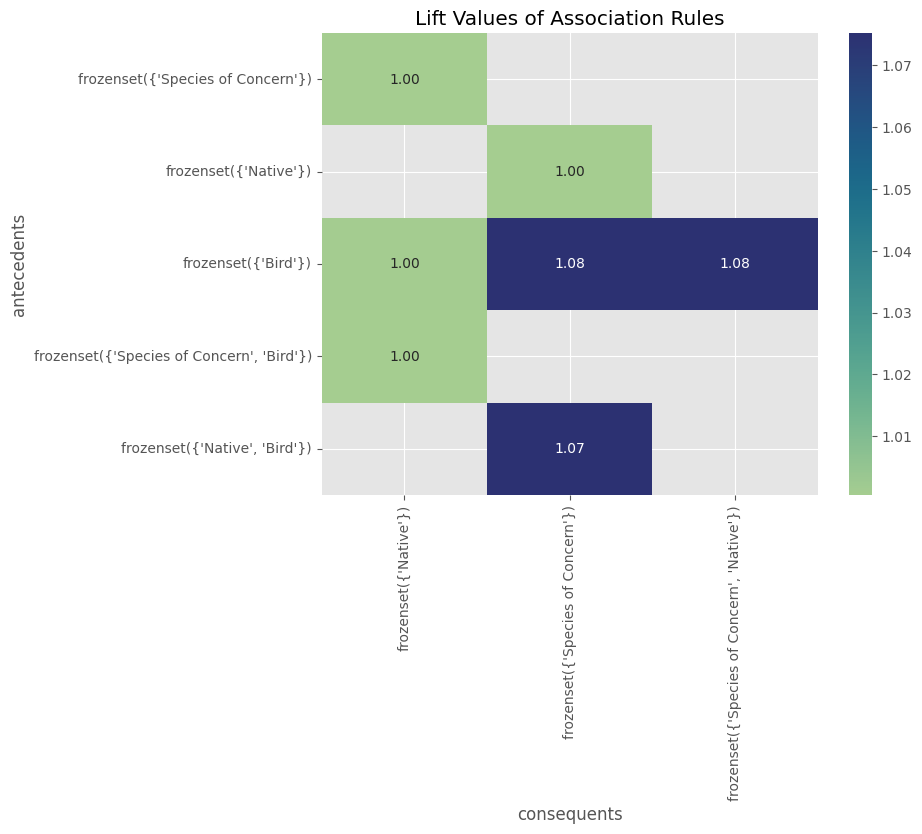

In [154]:
# Create a pivot table
pivot_table = rules_fpgrowth.pivot(index='antecedents', columns='consequents', values='lift')

# Heatmap for lift values
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='crest')
plt.title('Lift Values of Association Rules')
plt.show()
